# Predavanje 4

## Matplotlib

Prvo učitamo biblioteku, i kažemo da će se slike renderirati u bilježnici, ali praćene kao zasebni objekti. `%matplotlib inline` ima negativnu stranu da sve vezano uz pojedinu sliku moramo napisati u jednoj ćeliji; ne možemo graditi sliku "po dijelovima" i onda je samo jednom prikazati. Tako je puno teže učiti što se zbiva.

In [1]:
%matplotlib -l

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl', 'widget']


In [2]:
%matplotlib agg

In [3]:
import matplotlib.pyplot as plt

Matplotlib ima nekoliko načina upotrebe. Najjednostavniji, direktno preko `plt.` metodâ (kao što je `plt.plot`), pretpostavlja da u svakom trenutku imamo jednu sliku na kojoj implicitno radimo --- na kraju izvršavanja ćelije se ta slika renderira u bilježnicu. Taj pristup je u redu za `inline` mod, ali je prilično beskoristan u ostalim slučajevima. Zato ćemo pokazati "objektni" način, gdje možemo na sliku referirati kao što je uobičajeno u Pythonu: preko imena objekata.

Tradicionalni nazivi za objekte koji omogućuju crtanje su `fig` (_figure_ --- sama površina po kojoj se crta) i `ax` (_axes_ --- koordinatni sustav koji posjeduje brojne metode za crtanje).

In [4]:
fig1, ax1 = plt.subplots()
ax1.set_title('Proba')
ax1.plot([1, 2, 3], [5, 7, 2])
ax1.plot([3, 4, 2, 0], [1, 8, 3, 4])

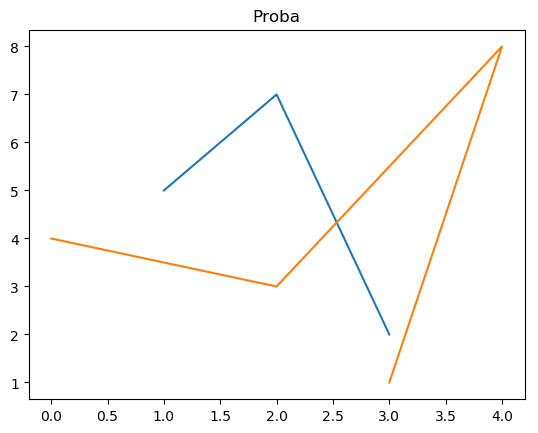

In [5]:
fig1

`plot` metodu smo već upoznali, ona prima dvije jednako dugačke liste (ili Numpy arraya) apscisâ i ordinatâ, crta odgovarajuće točke i spaja ih linijom. [Mnoge druge metode](https://matplotlib.org/api/axes_api.html#basic) imaju slično sučelje, pa ćemo prikazivati kako ono funkcionira uglavnom na primjeru `plot` metode.

Pored obaveznih parametara (lista `x`eva i `y`ova), možemo dati još mnoge [imenovane parametre](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) koji određuju stil. Inače, Matplotlib će različitim linijama dodijeliti različite automatski odabrane stilove.

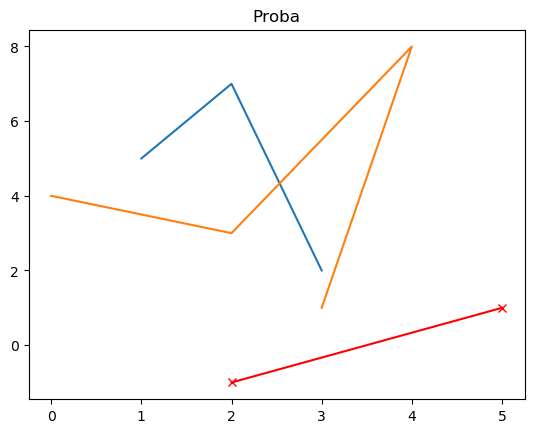

In [6]:
ax1.plot([2, 5], [-1, 1], color='red', marker='x')
fig1

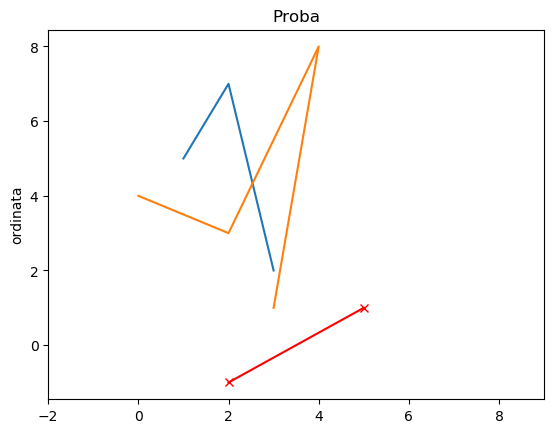

In [7]:
ax1.set_ylabel('ordinata')
ax1.set_xlim(-2, 9)
fig1

In [8]:
fig2, (ax11, ax12) = plt.subplots(2, sharex=True, sharey=True)

In [9]:
ax11.set(xlim=(0, 2), ylim=(0, 2))
ax11.text(1, 1, 'Matematički')
ax12.text(1, 1, 'softver')

Text(1,1,'softver')

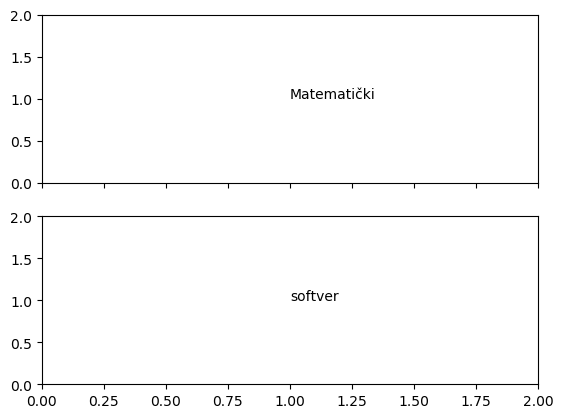

In [10]:
fig2

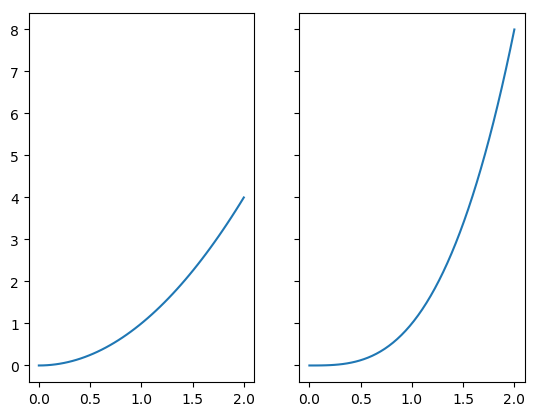

In [11]:
import numpy as np
fig3, (lijevo, desno) = plt.subplots(1, 2, sharey=True)
x2 = np.linspace(0, 2)
lijevo.plot(x2, x2**2)
desno.plot(x2, x2**3)
fig3

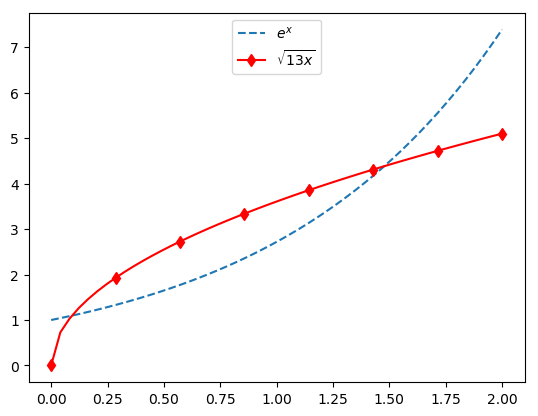

In [12]:
fig4, ax4 = plt.subplots()
ax4.plot(x2, np.exp(x2), label=r'$e^{x}$', linestyle='--')
ax4.plot(x2, np.sqrt(13 * x2), label=r'$\sqrt{13x}$', color='red', marker='d', markevery=7)
ax4.legend(loc=9)
fig4

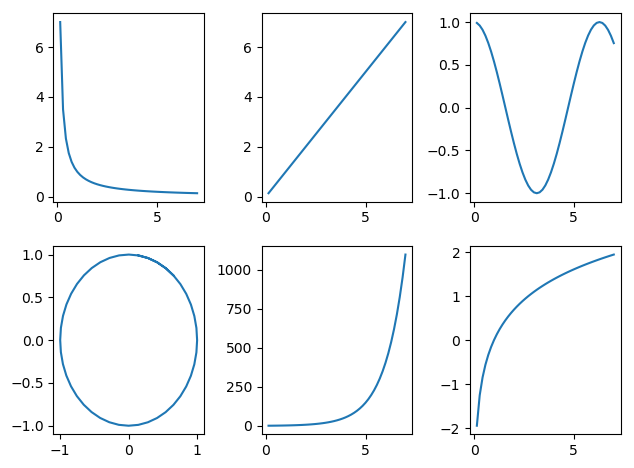

In [13]:
fig6, ((gl, gs, gd), (dl, ds, dd)) = plt.subplots(2, 3)
fig6.tight_layout()
x = np.linspace(0, 7)[1:]
gl.plot(x, 1/x)
gs.plot(x, x)
gd.plot(x, np.cos(x))
dl.plot(np.sin(x), np.cos(x))
ds.plot(x, np.exp(x))
dd.plot(x, np.log(x))
fig6

In [14]:
astro = plt.imread('astro.png')
astro.shape

(512, 512, 3)

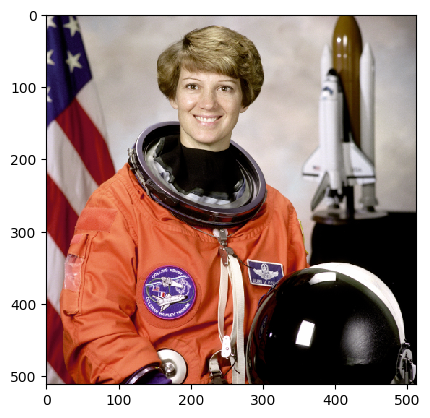

In [15]:
figa, axa = plt.subplots()
axa.imshow(astro)
figa

`astro` je najobičniji Numpy array, a ako ga srežemo na dubinu 1, možemo i zadati [colormap](https://matplotlib.org/examples/color/colormaps_reference.html) koji kaže kako će se brojčane vrijednosti prikazivati.

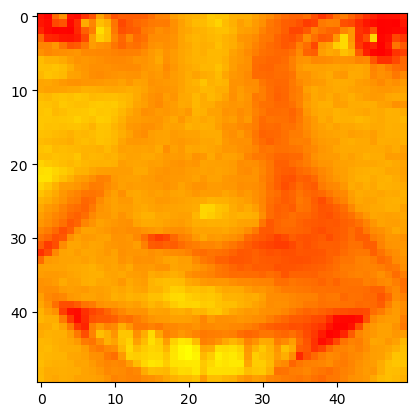

In [16]:
axa.imshow(astro[100:150, 200:250, 2], cmap='autumn')
figa

Još neki zanimljivi primjeri mogu se naći na https://matplotlib.org/tutorials/introductory/images.html.

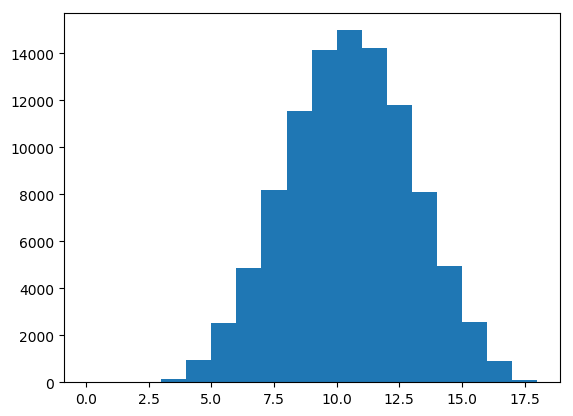

In [17]:
tri_kocke = np.random.uniform(1, 6, (100_000, 3)).sum(axis=1)
slika, koord = plt.subplots()
koord.hist(tri_kocke, bins=range(19))
slika

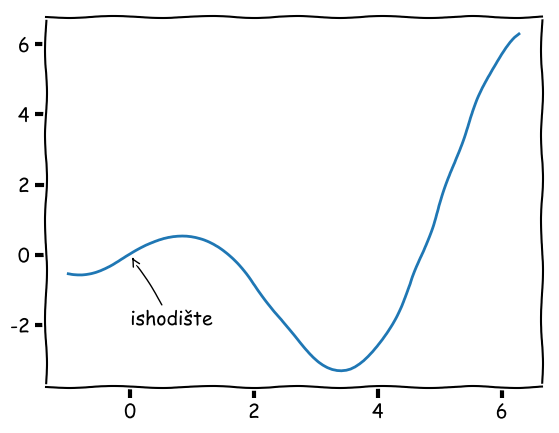

In [18]:
with plt.xkcd():
    figxkcd, axkcd = plt.subplots()
    x = np.linspace(-1, 2 * np.pi, 100)
    axkcd.plot(x, x * np.cos(x))
    axkcd.annotate('ishodište', (0, 0), (0, -2), arrowprops=dict(arrowstyle='->'))
figxkcd

In [19]:
plt.rcdefaults()

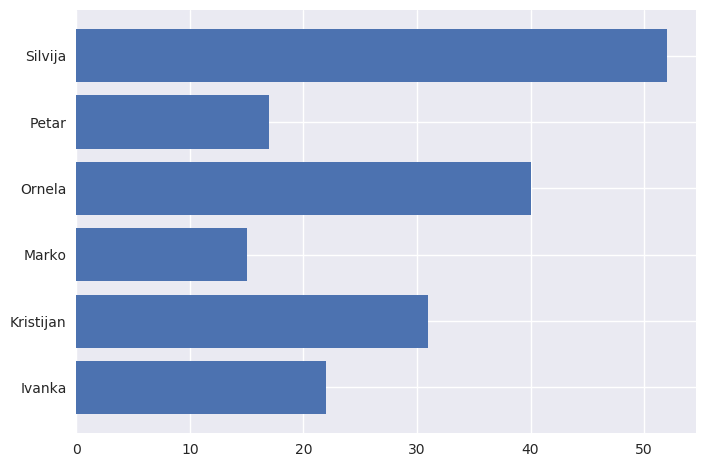

In [20]:
bodovi = {
    'Marko': 15,
    'Silvija': 52,
    'Ornela': 40,
    'Kristijan': 31,
    'Petar': 17,
    'Ivanka': 22,
}
with plt.style.context('seaborn'):
    slika, crtaj = plt.subplots()
    crtaj.barh(list(bodovi.keys()), list(bodovi.values()))
slika

In [21]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

In [22]:
fig6.canvas.get_supported_filetypes_grouped()

{'Encapsulated Postscript': ['eps'],
 'Joint Photographic Experts Group': ['jpeg', 'jpg'],
 'PGF code for LaTeX': ['pgf'],
 'Portable Document Format': ['pdf'],
 'Portable Network Graphics': ['png'],
 'Postscript': ['ps'],
 'Raw RGBA bitmap': ['raw', 'rgba'],
 'Scalable Vector Graphics': ['svg', 'svgz'],
 'Tagged Image File Format': ['tif', 'tiff']}

In [23]:
fig6.savefig('6 grafova.pdf')

Detaljnije na https://matplotlib.org/tutorials/introductory/lifecycle.html.

In [24]:
from mpl_toolkits import mplot3d

In [25]:
fig3d = plt.figure()
ax3d = fig3d.add_subplot(1, 1, 1, projection='3d')

In [26]:
x, y = np.meshgrid(np.linspace(-2, 2), np.linspace(0, 4))
z = np.cos(x + np.sqrt(y))

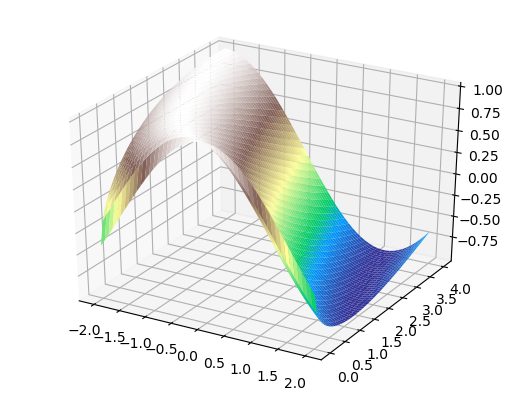

In [27]:
ax3d.plot_surface(x, y, z, cmap='terrain', linewidth=1)
fig3d

Više na https://matplotlib.org/tutorials/introductory/sample_plots.html.